In [ ]:
#!pip install pyagrum

In [ ]:
#!pip install numpy


In [81]:
# Importing Related Libraries

import pyAgrum as gum
import pyAgrum.lib.notebook as gnb


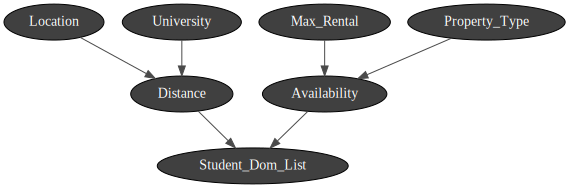

In [82]:
# Creating the network
bn = gum.BayesNet('Student Wohnheim')

# Adding the related nodes and correspondence
University = bn.add(gum.LabelizedVariable('University', 'University',['HBRS_Sankt_Augustin', 'HBRS_Rheinbach', 'University_of_Bonn']))
Location = bn.add(gum.LabelizedVariable('Location', 'Location',['Sankt_Augustin', 'Rheinbach', 'Bonn']))
#'Near', 'Mid-Range', 'Far', 'Very_Far'
Distance = bn.add(gum.LabelizedVariable('Distance', 'Distance',['Near','Far']))
#'Single_Room', 'Dobule_Room', 'Semi-Apartment','Apartment', 'Double_Apartment', 'Differently Abled Friendly Apartment'
Property_Type = bn.add(gum.LabelizedVariable('Property_Type', 'Property_Type',['Single_Room','Apartment']))
#'300', '400', '500', '600', '700', '800', '900'
Max_Rental = bn.add(gum.LabelizedVariable('Max_Rental', 'Max_Rental',['Between_300_600','Between_600_900']))
Availability = bn.add(gum.LabelizedVariable('Availability', 'Availability',['Yes', 'No']))
# MAke sure always return a statement of your room confiramtion will be sent as a mail within a week.
Student_Dom_List = bn.add(gum.LabelizedVariable('Student_Dom_List', 'Student_Dom_List',['WOHNHEIM_BONN', 'WOHNHEIM_RHEINBACH', 'WOHNHEIM_SANKT_AUGUSTIN']))

# Adding the arcs
bn.addArc(University, Distance)
bn.addArc(Location, Distance)

# I feel these are unnecessary arcs as the distance is already given in the location
# bn.addArc(University, Property_Type)
# bn.addArc(University, Max_Rental)

bn.addArc(Property_Type, Availability)
bn.addArc(Max_Rental, Availability)
# bn.addArc(Distance, Availability)
bn.addArc(Distance,Student_Dom_List)
bn.addArc(Availability, Student_Dom_List)

gnb.showBN(bn, size="10")


In [86]:
# Trail_2
# Adding CPT's

bn.cpt(Location).fillWith([0.3333,0.3333,0.3333])
bn.cpt(University).fillWith([0.3333,0.3333,0.3333])
bn.cpt(Max_Rental).fillWith([0.6,0.4])
bn.cpt(Property_Type).fillWith([0.5,0.5])

# LHS - Part of the BN Chart
# For Based on the distance the probability is given
bn.cpt(Distance)[{'Location': 'Sankt_Augustin','University':'HBRS_Sankt_Augustin'}] = [0.7,0.3]
bn.cpt(Distance)[{'Location': 'Rheinbach','University': 'HBRS_Sankt_Augustin'}] = [0.6,0.4]
bn.cpt(Distance)[{'Location': 'Bonn','University': 'HBRS_Sankt_Augustin'}] = [0.4,0.6]

bn.cpt(Distance)[{'Location': 'Sankt_Augustin','University': 'HBRS_Rheinbach'}] = [0.6,0.4]
bn.cpt(Distance)[{'Location': 'Rheinbach','University': 'HBRS_Rheinbach'}] = [0.7,0.3]
bn.cpt(Distance)[{'Location': 'Bonn','University': 'HBRS_Rheinbach'}] = [0.4,0.6]

bn.cpt(Distance)[{'Location': 'Sankt_Augustin','University': 'University_of_Bonn'}] = [0.3,0.7]
bn.cpt(Distance)[{'Location': 'Rheinbach','University': 'University_of_Bonn'}] = [0.4,0.6]
bn.cpt(Distance)[{'Location': 'Bonn','University': 'University_of_Bonn'}] = [0.8,0.2]

# RHS - Part of the BN Chart
# For based on the availability the probability is given below
bn.cpt(Availability)[{'Max_Rental': 'Between_300_600','Property_Type': 'Single_Room'}] = [0.7,0.3]
bn.cpt(Availability)[{'Max_Rental': 'Between_300_600','Property_Type': 'Apartment'}] = [0.3,0.7]

bn.cpt(Availability)[{'Max_Rental': 'Between_600_900','Property_Type': 'Single_Room'}] = [0.4,0.6]
bn.cpt(Availability)[{'Max_Rental': 'Between_600_900','Property_Type': 'Apartment'}] = [0.8,0.2]

# Final Node

bn.cpt(Student_Dom_List)[{'Distance': 'Near','Availability': 'Yes'}] =  [0.7,0.15,0.15]
bn.cpt(Student_Dom_List)[{'Distance': 'Near','Availability': 'No'}] = [0.6,0.5,0.45]
bn.cpt(Student_Dom_List)[{'Distance': 'Far','Availability': 'Yes'}] = [0.4,0.6,0.5]
bn.cpt(Student_Dom_List)[{'Distance': 'Far','Availability':'No'}] = [0.8,0.25,0.2]

bn.check()
# Below commented are used to visualize the probability values given
# bn.cpt(Distance)
# bn.cpt(Student_Dom_List)
# bn.cpt(Location)

('Variable University : the CPT sum to less than 1 (normalization problem ?).',
 'Variable Location : the CPT sum to less than 1 (normalization problem ?).',
 'Variable Student_Dom_List : with (at least) parents <Distance:Near|Availability:No>, the CPT sum to more than 1.')

In [ ]:
# Inference_Part
# Whats funny is that you dont need this thing.
ie = gum.LazyPropagation(bn)

# Inference without evidence

ie.makeInference()
ie.addJointTarget(set([Location,University,Max_Rental,Property_Type,Student_Dom_List,Availability,Distance]))
ie.jointPosterior(set([Location,University,Max_Rental,Property_Type,Student_Dom_List,Availability,Distance]))


In [104]:
# Inference With Evidence

ie = gum.LazyPropagation(bn)
ie.makeInference()
ie.setEvidence({'Location':'Sankt_Augustin','University': 'HBRS_Sankt_Augustin','Max_Rental': 'Between_300_600','Property_Type': 'Single_Room','Distance': 'Near', 'Availability': 'Yes'})
ie.makeInference()
ie.posterior(Student_Dom_List)

(pyAgrum.Potential<double>@0x1d5d860) 
  Student_Dom_List           |
WOHNHEIM_|WOHNHEIM_|WOHNHEIM_|
---------|---------|---------|
 0.7000  | 0.1500  | 0.1500  |

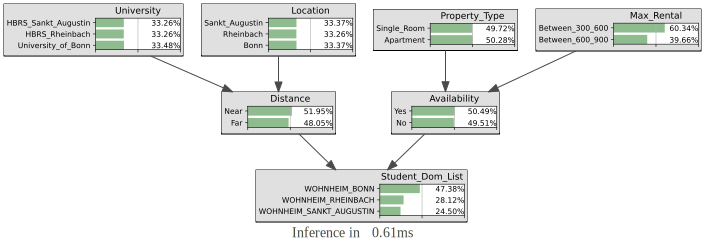

In [103]:
gnb.showInference(bn,evs={},size='10')


In [ ]:
# Trial 1
# Adding the CPTs

'''
= = = University = = =
As per the given order of the universities the values are assigned as follows: 
Here we chose higher Probability for University of Bonn as it is the most 
nearest university to the city among the three.
= = = Location = = =
As per the given order of the locations the values are assigned as follows:
Here we chose higher Probability for University of Bonn as it is the most nearest
to the city among the three.
= = = Distance = = =
As per the given order of the distances the values are assigned as follows:
Here we chose higher Probability for Near as it is the most reasonable thing every 
individual would prefer.
= = = Property_Type = = =
As per the given order of the property types the values are assigned as follows:
Here we are giving equal weightage to all the property types as we are not sure
about the preferences of the students.
= = = Max_Rental = = =
As per the given order of the max rentals the values are assigned as follows:
Here we are choosing higher probability for 300 as it is the cheapest among all
the other options and  other values are assigned with decreasing probability.
'''

bn.cpt(University).fillWith([0.3333, 0.3333, 0.3333]) 
'''
1. The following commented are depndednt are inflluent by the university, 
   so it cannot be filled as such.
2. It should be filled according to the university perspective.

# bn.cpt(Location).fillWith([0.25,0.25,0.5])
# bn.cpt(Distance).fillWith([0.5,0.25,0.15,0.10])
'''
bn.cpt(Property_Type).fillWith([0.1666,0.1666,0.1666,0.1666,0.1666,0.1666])
bn.cpt(Max_Rental).fillWith([0.4,0.2,0.2,0.1,0.05,0.025,0.025])


bn.cpt(Location)[{'University': 'HBRS_Sankt_Augustin'}] = [0.5,0.15,0.35]
bn.cpt(Location)[{'University': 'HBRS_Rheinbach'}] = [0.15,0.5,0.35]
bn.cpt(Location)[{'University': 'University_of_Bonn'}] = [0.2,0.2,0.6]

bn.cpt(Distance)[{'Location': 'Sankt_Augustin'}] = [0.5,0.10,0.15,0.25]
bn.cpt(Distance)[{'Location': 'Rheinbach'}] = [0.5,0.1,0.15,0.25]
bn.cpt(Distance)[{'Location': 'Bonn'}] = [0.5,0.3,0.15,0.05]

prop = ['Single_Room', 'Dobule_Room', 'Semi-Apartment','Apartment', 'Double_Apartment', 'Differently Abled Friendly Apartment']
rent = ['300', '400', '500', '600', '700', '800', '900']
distance = ['Near', 'Mid-Range', 'Far', 'Very_Far']

# For Availability for all the combinations of property type, max rental and distance
for i in prop:
    for j in rent:
        for k in distance:
            bn.cpt(Availability)[{'Property_Type': i, 'Max_Rental': j, 'Distance': k}] = [0.9,0.1]

#Add the CPT for the availability of the property type of Different Abled Friendly Apartment ???
            
bn.cpt(Student_Dom_List)[{'Availability': 'Yes'}] = [0.5,0.4,0.1]
bn.cpt(Student_Dom_List)[{'Availability': 'No'}] = [0.5,0.4,0.1]



In [ ]:

# Observe the values of the Property_Type and Max_Rental nodes
# bn.setEvidence({'Max_Rental': 0, 'Property_Type': 0})

# Infer the posterior probabilities of the robot_understanding and robot_response nodes
ie = gum.LazyPropagation(bn)

# Observe the values of the Max_Rental and Property_Type nodes
# ie.setEvidence({'Max_Rental': '300', 'Property_Type': 'Single_Room'})

ie.makeInference()


# Availability_posterior = ie.posterior(Availability)
# Student_Dom_List_posterior = ie.posterior(Student_Dom_List)
# print(list(Availability_posterior.findAll(Property_Type)))

# Student_Dom_List = Student_Dom_List_posterior.toarray().argmax()

# print('Student_Dom_List:{}'.format(Student_Dom_List))

In [ ]:
import pyAgrum.lib.notebook as gnb

gum.config['notebook','potential_with_fraction']=1
gum.config['notebook','potential_fraction_with_latex']=1
gum.config['notebook','potential_fraction_limit']=100

print(bn.cpt(Availability))